In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
%matplotlib notebook

In [2]:
def prop(psi, lam, z):
    """
    Near field free-space propagation of array psi over a distance z with wavelength lam.
    lam and z have to be provided in pixel units.
    """
    # Fourier transform of input psi (at z=0)
    fpsi = np.fft.fftn(psi)
    
    # Generate Fourier coordinates
    M, N = psi.shape
    v, u = np.meshgrid(np.fft.fftfreq(M), np.fft.fftfreq(N), indexing='ij')
    
    # Multiply FT with Fresnel propagator
    fpsi1 = fpsi * np.exp(-1j * np.pi * lam * z * (v**2 + u**2))
    
    # Inverse-Fourier transform
    psi1 = np.fft.ifftn(fpsi1)
    
    return psi1

In [3]:
np.meshgrid?

In [4]:
logo = imageio.imread('https://upload.wikimedia.org/wikipedia/it/5/50/Trieste-Logo.png')[:,:,1]/255.
img = np.ones((1024, 1024), complex)
img[228:-228,365:-365] = logo

<IPython.core.display.Javascript object>


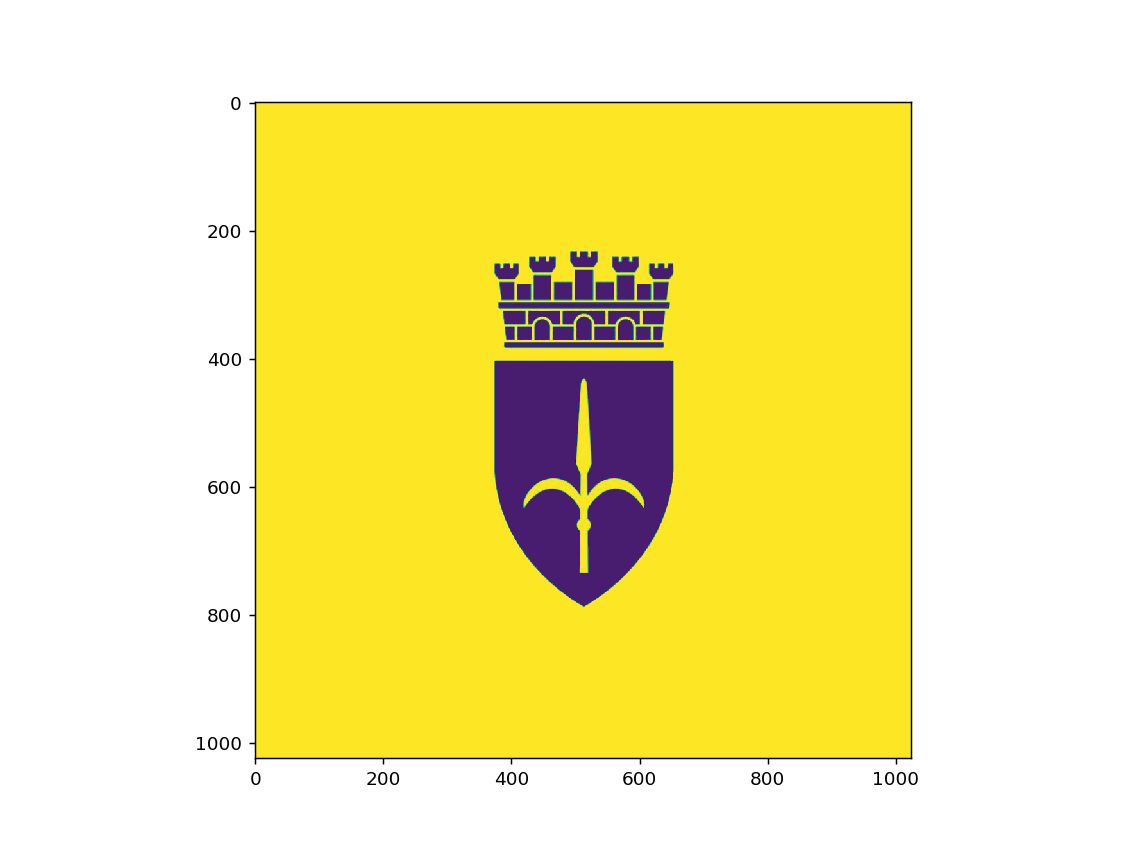

In [5]:
plt.figure()
plt.imshow(img.real)

<IPython.core.display.Javascript object>


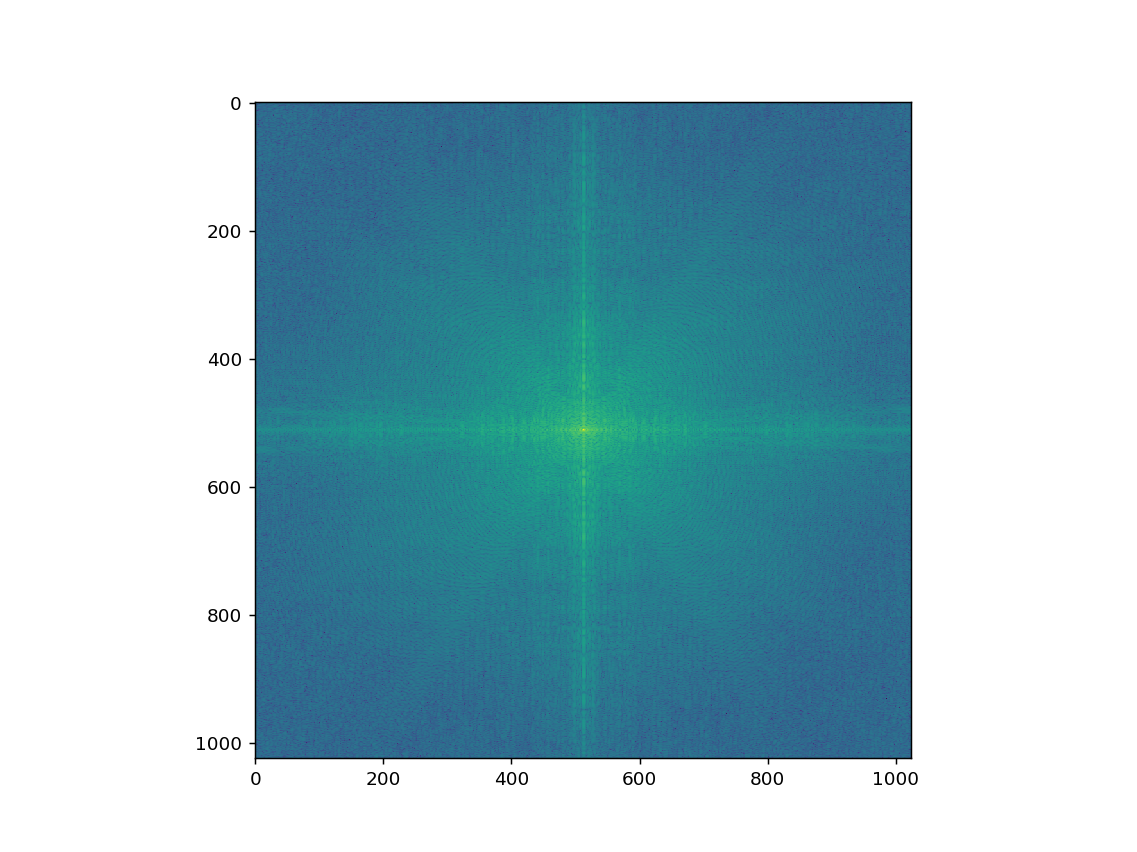

In [7]:
psi = img
fpsi = np.fft.fftn(psi)
plt.figure()
plt.imshow(np.log(np.abs(np.fft.fftshift(fpsi))))

<IPython.core.display.Javascript object>


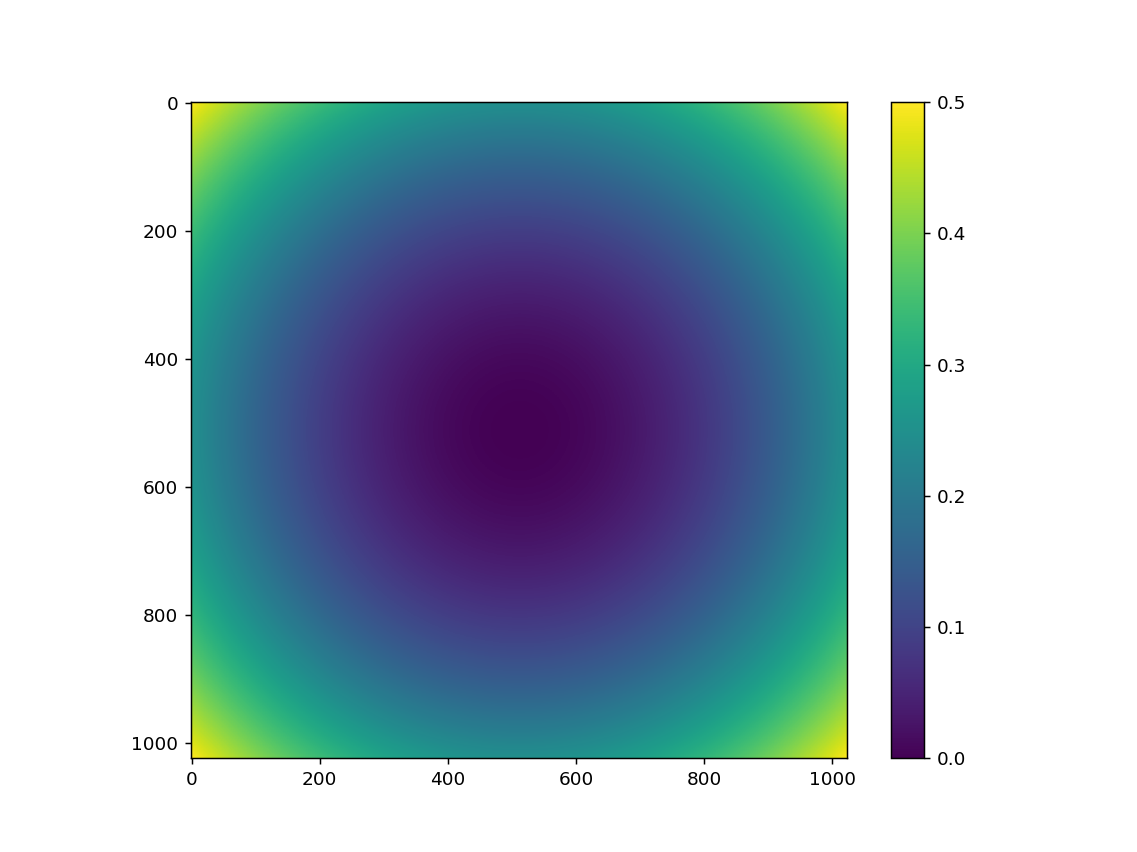

In [15]:
M, N = psi.shape
v, u = np.meshgrid(np.fft.fftfreq(M), np.fft.fftfreq(N), indexing='ij')
plt.figure()
plt.imshow(np.fft.fftshift(v**2 + u**2))
plt.colorbar()

In [21]:
# e.g. laser experiment
lam = 632e-9
px = 10e-6
z = 1

psi1 = prop(psi, lam/px, z/px)

<IPython.core.display.Javascript object>


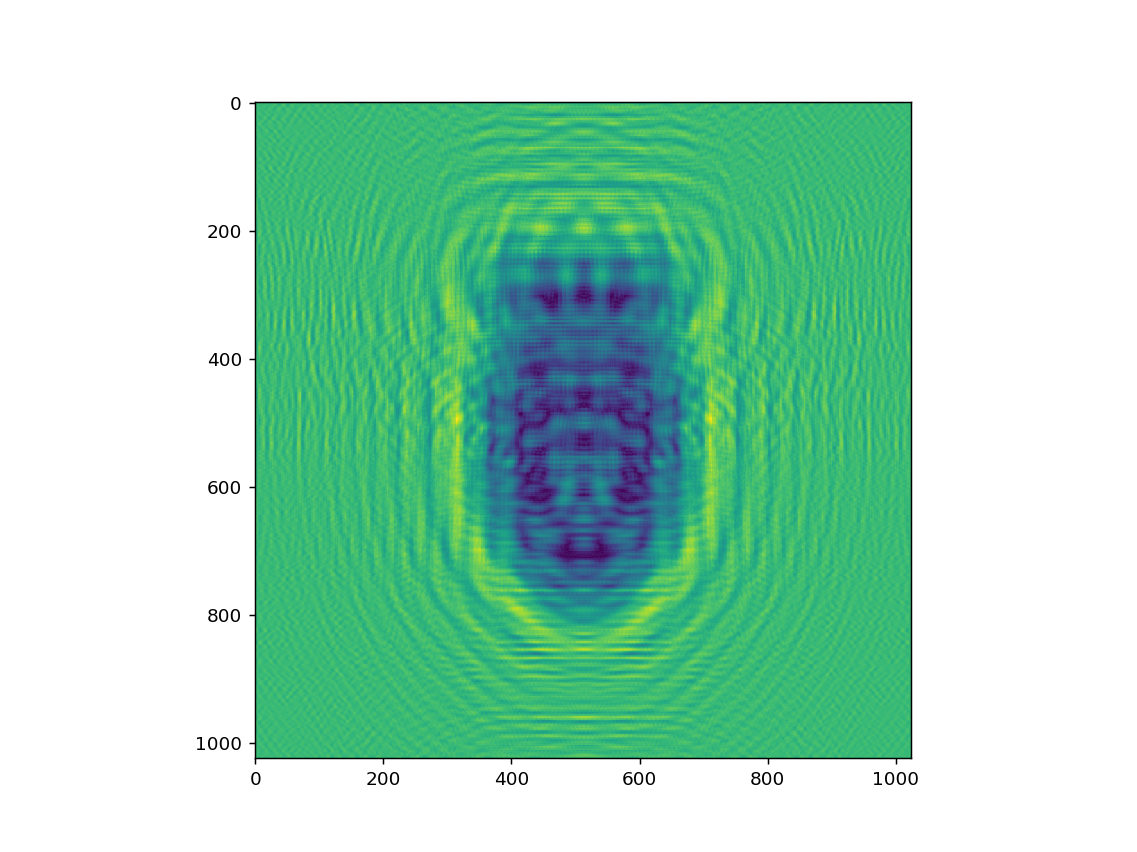

In [22]:
plt.figure()
plt.imshow(abs(psi1))

In [19]:
# holography experiment
lam = 632e-9
px = 10e-6
z = .05

# 3 < f
print("z has to be smaller than %f" % (30**2 * px**2 / (3 * lam)))

z has to be smaller than 0.047468


<IPython.core.display.Javascript object>


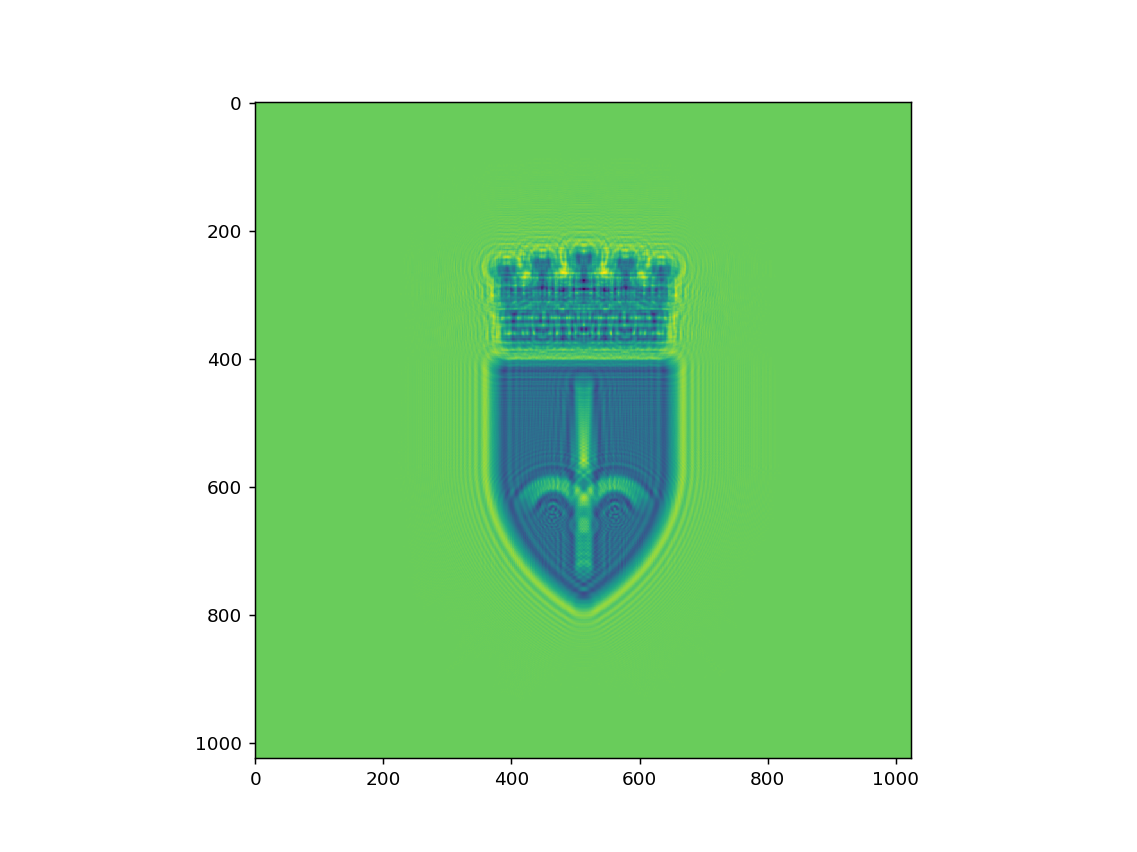

In [22]:
psi =(1 + .01*img)

psi1 = prop(psi, lam/px, z/px)
I = np.abs(psi1)**2
plt.figure()
plt.imshow(I)

<IPython.core.display.Javascript object>


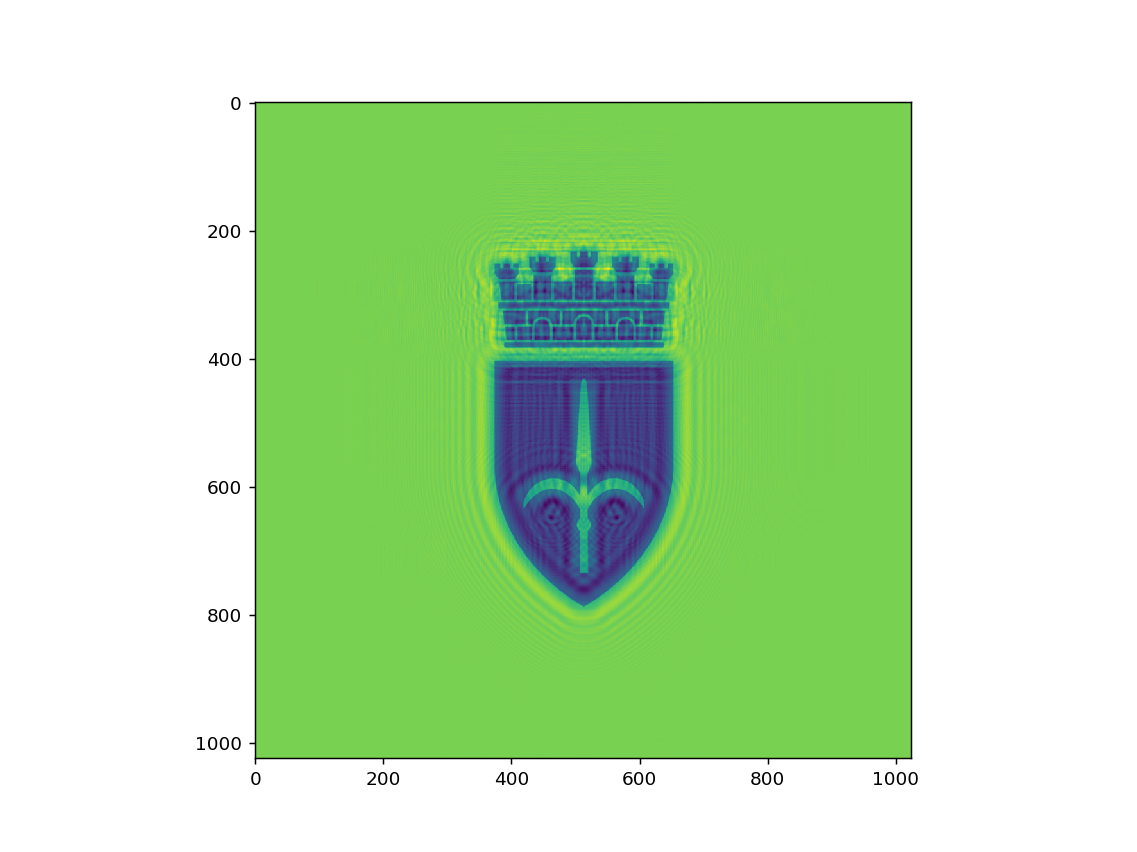

In [23]:
rec = prop(I, lam/px, -z/px)
plt.figure()
plt.imshow(rec.real)

<IPython.core.display.Javascript object>


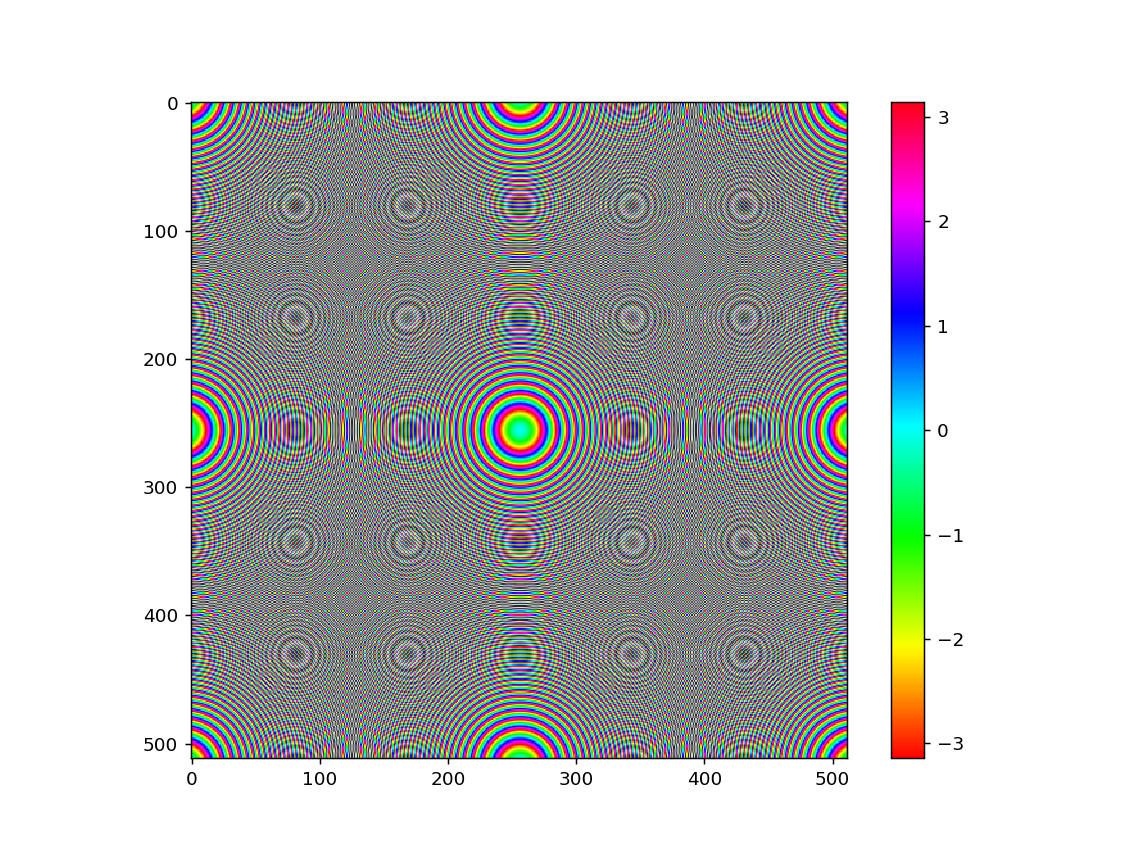

In [41]:
z = 1000
lam = 1.
M, N = 512, 512
v, u = np.meshgrid(np.fft.fftfreq(M), np.fft.fftfreq(N), indexing='ij')
Fresnel_propagator = np.exp(-1j * np.pi * lam * z * (v**2 + u**2))
plt.figure()
plt.imshow(np.fft.fftshift(np.angle(Fresnel_propagator)), cmap='hsv')
plt.colorbar()

In [33]:
z

5